In [1]:
%load_ext pyslim_magic

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%%slim_stats_reps 200
// set up a single locus simulation of drift
initialize()
{
    // set the overall mutation rate
    initializeMutationRate(0);
    // m1 mutation type: neutral
    initializeMutationType("m1", 0.5, "f", 0.0);
    // g1 genomic element type: uses m1 probability 1
    initializeGenomicElementType("g1", c(m1), c(1.0));
    // uniform chromosome of length 1 site
    initializeGenomicElement(g1, 0, 0);
    // uniform recombination along the chromosome
    initializeRecombinationRate(1e-8);
    suppressWarnings(T);
}

// create a population of 100 individuals
1 {
    sim.addSubpop("p1", 100);
    // sample 100 haploid genomes 
    target = sample(p1.genomes, 100);
    // add a mutation to those genomes
    // H_0 = 0.5 here
    target.addNewMutation(m1,0, 0);
    log = sim.createLogFile("/dev/stdout", logInterval=1);
    log.addGeneration();
    log.addCustomColumn("H", "calcHeterozygosity(p1.genomes);"); 
}

// run to generation 0
300 late() {
    sim.simulationFinished();
    }


,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H190,H191,H192,H193,H194,H195,H196,H197,H198,H199
generation,,,,,,,,,,,,,,,,,,,,,
1,0.49500,0.48720,0.49875,0.49980,0.49995,0.49820,0.49680,0.49995,0.49995,0.4998,...,0.49980,0.49995,0.49955,0.49155,0.49875,0.49955,0.49955,0.49980,0.49980,0.49680
2,0.49680,0.49595,0.49920,0.49920,0.49755,0.49395,0.49920,0.49995,0.49755,0.4998,...,0.49875,0.49755,0.49995,0.44220,0.49595,0.49680,0.49755,0.49820,0.49955,0.49820
3,0.49875,0.49020,0.49875,0.49595,0.49280,0.49280,0.49875,0.49500,0.49980,0.4998,...,0.47580,0.49875,0.50000,0.40755,0.48875,0.49920,0.49755,0.49995,0.49595,0.49155
4,0.48875,0.49280,0.49755,0.46620,0.48720,0.49920,0.50000,0.49995,0.49920,0.4982,...,0.47120,0.49280,0.49280,0.40755,0.48195,0.49995,0.49680,0.49680,0.49680,0.49955
5,0.49155,0.49155,0.49280,0.47580,0.49595,0.49995,0.49395,0.49995,0.49980,0.4992,...,0.46080,0.49820,0.49755,0.40755,0.46620,0.49680,0.49680,0.49820,0.49395,0.49020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.49280,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.49875,0.0000,...,0.49680,0.00000,0.00000,0.00000,0.00000,0.00000,0.16380,0.03920,0.00000,0.47795
297,0.48875,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.49595,0.0000,...,0.49955,0.00000,0.00000,0.00000,0.00000,0.00000,0.21875,0.02955,0.00000,0.49280
298,0.47355,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.49280,0.0000,...,0.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.22620,0.00000,0.00000,0.49595


In [3]:
x = _


In [4]:
# function for drift expectation
def exp_decay_drift(H0, N, gens):
    res = [H0]
    h = H0
    for i in range(gens):
        tmp = h * (1 - (1 / (2*N)))
        res.append(tmp)
        h = tmp
    return res

e = exp_decay_drift(0.5, 100, 299)

plot mean Heterozygosity across reps versus the expected value

<AxesSubplot:xlabel='generation', ylabel='heterozygosity'>

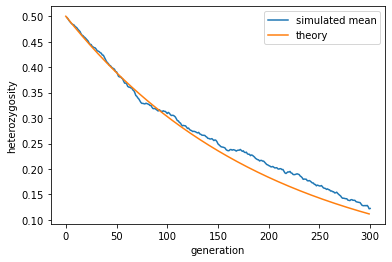

In [5]:
x.mean(axis=1).plot(ylabel="heterozygosity", label="simulated mean", legend=True)
pd.Series(e).plot(label="theory",legend="True")

## Hardy Weinberg

In [6]:
%%slim_stats_reps_stack 10
// set up a single locus simulation of drift
initialize()
{
    // set the overall mutation rate
    initializeMutationRate(0);
    // m1 mutation type: neutral
    initializeMutationType("m1", 0.5, "f", 0.0);
    // g1 genomic element type: uses m1 probability 1
    initializeGenomicElementType("g1", c(m1), c(1.0));
    // uniform chromosome of length 1 site
    initializeGenomicElement(g1, 0, 0);
    // uniform recombination along the chromosome
    initializeRecombinationRate(1e-8);
    suppressWarnings(T);
}

// create a population of 100 individuals
1 {
    sim.addSubpop("p1", 100);
    // sample 100 haploid genomes 
    target = sample(p1.genomes, 100);
    // add a mutation to those genomes
    // H_0 = 0.5 here
    target.addNewMutation(m1,0, 0);
    cat("generation,p,x11,x12,x22\\n");
}
1:300 late(){
    inds = p1.sampleIndividuals(100);
    ind_count = inds.countOfMutationsOfType(m1);
    counts = c(0, 0, 0);
    for (x in ind_count)
        counts[x] = counts[x] + 1;
    counts = counts / 100;
    freqs = sim.mutationFrequencies(p1);
    if (length(freqs) > 0.0)
        cat(sim.generation);
        cat(",");
        cat(freqs);
        cat(",");
        cat(counts,sep=",");
        cat("\\n");
    }
// run to generation 0
300 late() {
    sim.simulationFinished();
    }


,p,x11,x12,x22
generation,,,,
1.0,0.590,0.14,0.54,0.32
2.0,0.580,0.23,0.38,0.39
3.0,0.595,0.18,0.45,0.37
4.0,0.565,0.17,0.53,0.30
5.0,0.515,0.25,0.47,0.28
...,...,...,...,...
NaN,NaN,1.00,0.00,0.00
NaN,NaN,1.00,0.00,0.00
NaN,NaN,1.00,0.00,0.00


In [7]:
# get output from slim_magic
df = _

## HWE Expectations

In [8]:
import numpy as np

def hwe(p):
    return np.array([p**2, 2 * p * (1 - p), (1 - p)**2])



expected = hwe(np.linspace(0,1,100))

Text(0, 0.5, 'genotype frequency')

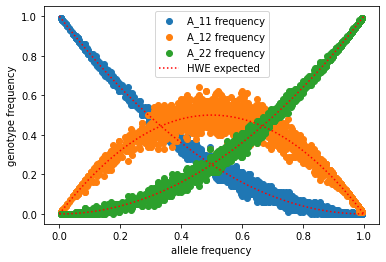

In [9]:
from matplotlib import pyplot as plt

#plot simulated
plt.scatter(df.p, df.x11, label="A_11 frequency")
plt.scatter(df.p, df.x12, label="A_12 frequency")
plt.scatter(df.p, df.x22, label="A_22 frequency")


#plot expected
plt.plot(np.linspace(0,1,100),expected[0,:], c="red", linestyle="dotted", label="HWE expected")
plt.plot(np.linspace(0,1,100),expected[1,:], c="red", linestyle="dotted")
plt.plot(np.linspace(0,1,100),expected[2,:], c="red", linestyle="dotted")

plt.legend()
plt.xlabel("allele frequency")
plt.ylabel("genotype frequency")